👋 Hello folks! Welcome to this exciting mini-project on Car Price Prediction!

In this project, we take a real-world dataset and walk through the entire Machine Learning pipeline — from data exploration to building regression models and improving results.

We begin with EDA (Exploratory Data Analysis) to understand how different features like engine size, horsepower, and mileage affect car prices. Then, we dive into data preprocessing, cleaning the data and preparing it for modeling.

We first apply Multiple Linear Regression to make predictions. But we didn’t stop there! To improve our results, we used Polynomial Regression, which helped us better capture non-linear patterns and achieve lower error rates and a more accurate model.

The project is built on the Car Price dataset, and everything is done using Python and popular libraries like pandas, matplotlib, seaborn, and scikit-learn.

Hope you enjoy the journey! 🚗📊✨

In [1]:
# importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Exploratory Data Analysis

In [3]:
data = pd.read_csv(r"C:\Users\changeme\Downloads\CarPrice_Assignment.csv")
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [4]:
data_EDA = data.copy()
data_EDA.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'price vs fueltype')

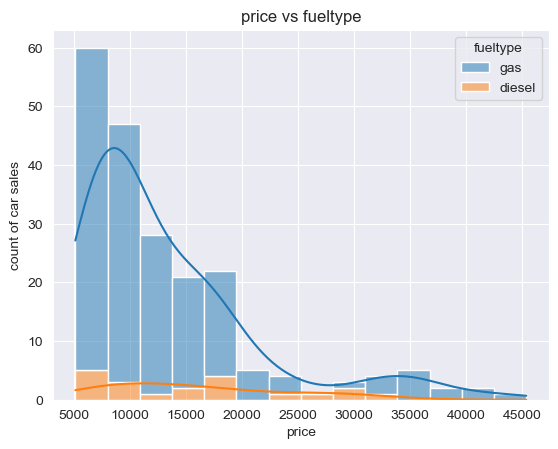

In [8]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='fueltype',multiple = 'stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("price vs fueltype")

C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'price vs aspiration')

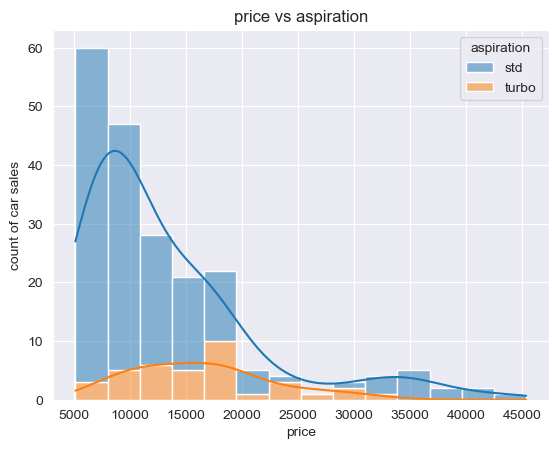

In [9]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='aspiration',multiple = 'stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("price vs aspiration")

C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'price vs doornumber')

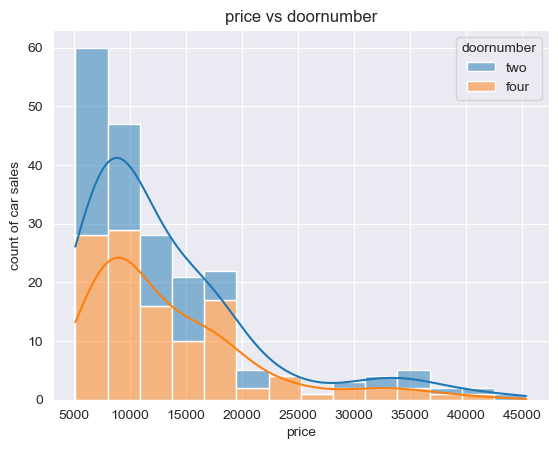

In [10]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='doornumber',multiple = 'stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("price vs doornumber")

C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'price vs carbody')

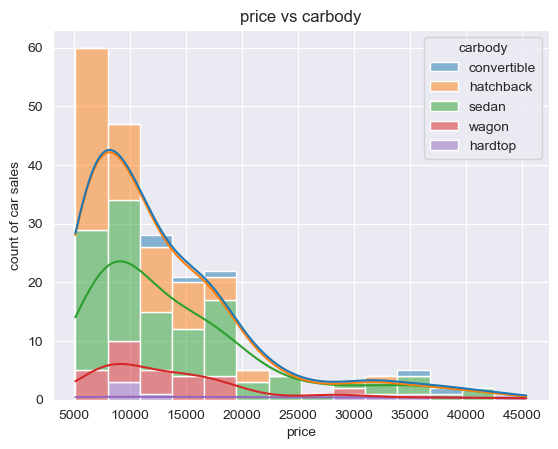

In [11]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='carbody',multiple = 'stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("price vs carbody")

C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'price vs drivewheel')

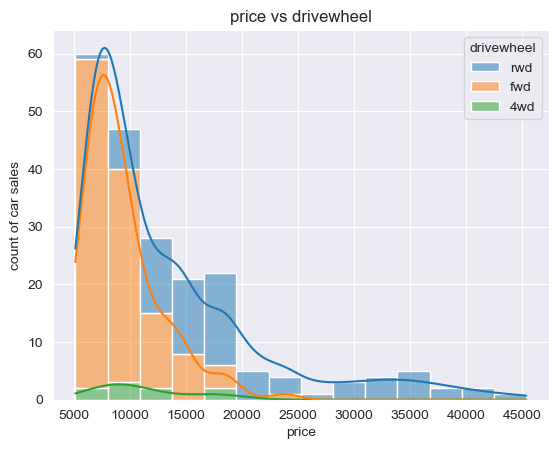

In [12]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='drivewheel',multiple = 'stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("price vs drivewheel")

C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'price vs enginelocation')

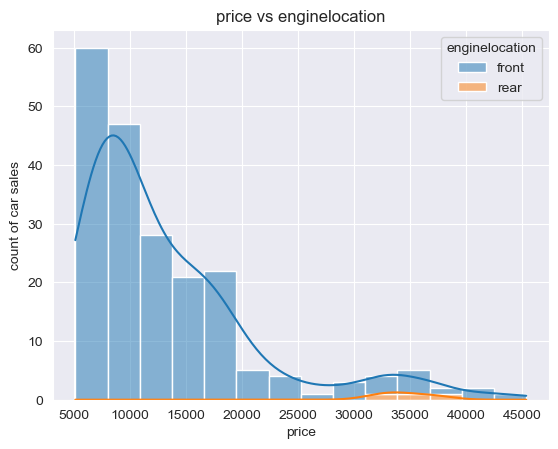

In [13]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='enginelocation',multiple = 'stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("price vs enginelocation")

C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'price vs enginetype')

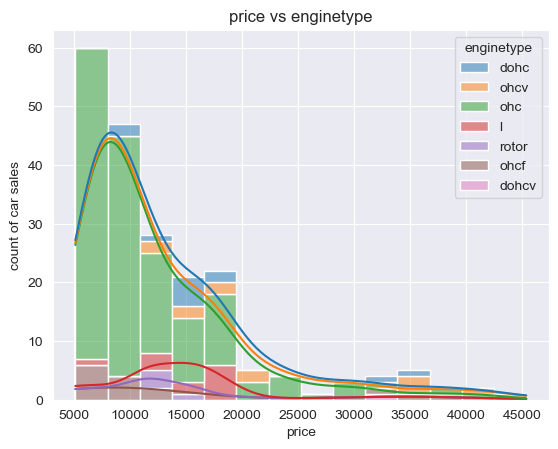

In [14]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='enginetype',multiple = 'stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("price vs enginetype")

C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'price vs cylindernumber')

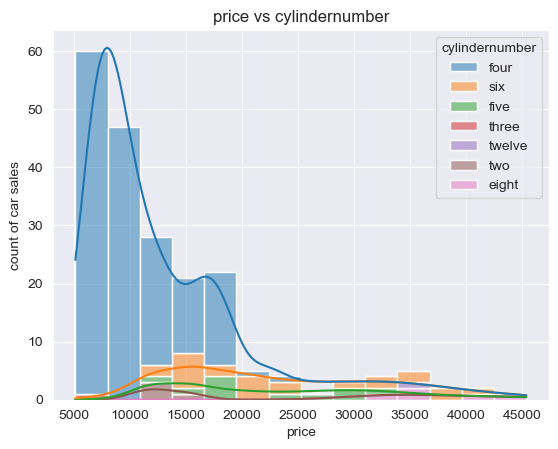

In [17]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='cylindernumber',multiple = 'stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("price vs cylindernumber")

C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'price vs fuelsystem')

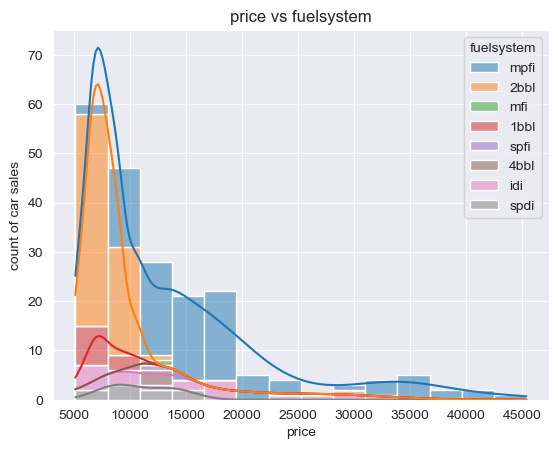

In [19]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA,x='price',kde=True,hue='fuelsystem',multiple = 'stack')
plt.ylabel("count of car sales")
plt.xlabel("price")
plt.title("price vs fuelsystem")

<Axes: xlabel='price'>

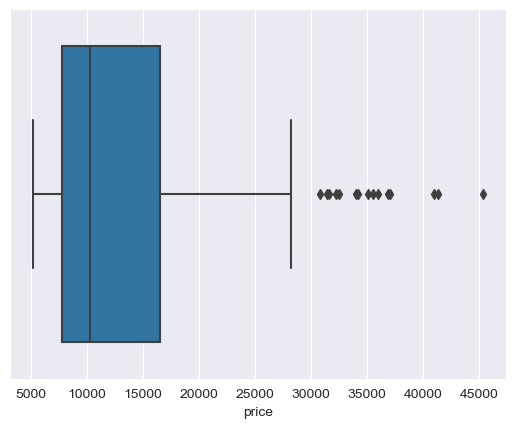

In [21]:
sns.boxplot(data=data_EDA,x='price',hue='aspiration')

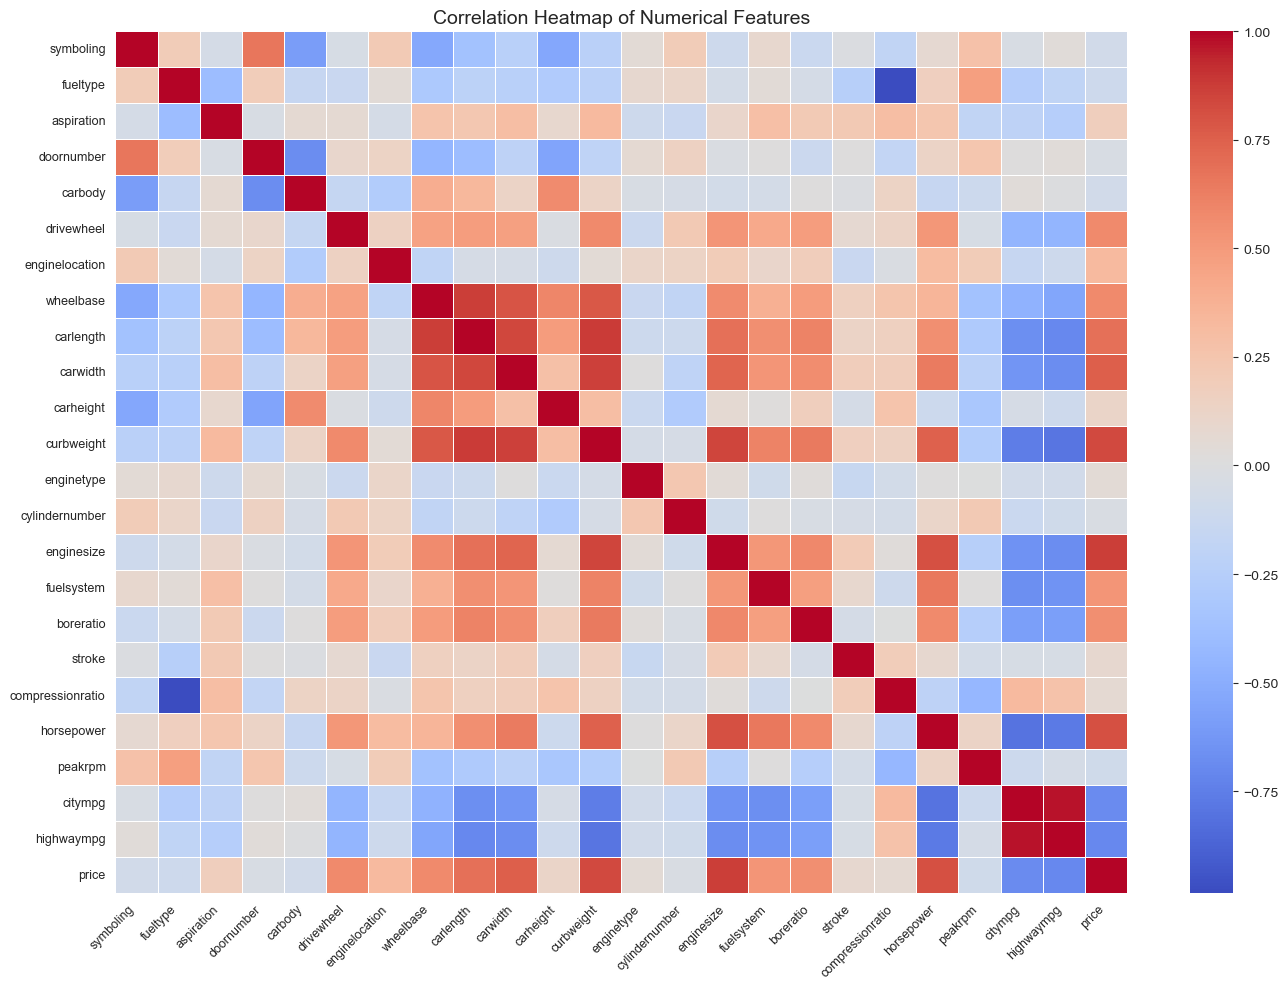

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
correlation_matrix = data_EDA.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))  # Increased size

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    #annot=True,              # Show correlation numbers
    fmt=".2f",               # Format as decimal
    cmap="coolwarm",         # Color map
    linewidths=0.5,          # Line between boxes
    annot_kws={"size": 8}    # Smaller font size inside boxes
)

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

# Title
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

# Data preprocessing

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv(r"C:\Users\changeme\Downloads\CarPrice_Assignment.csv")
data

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

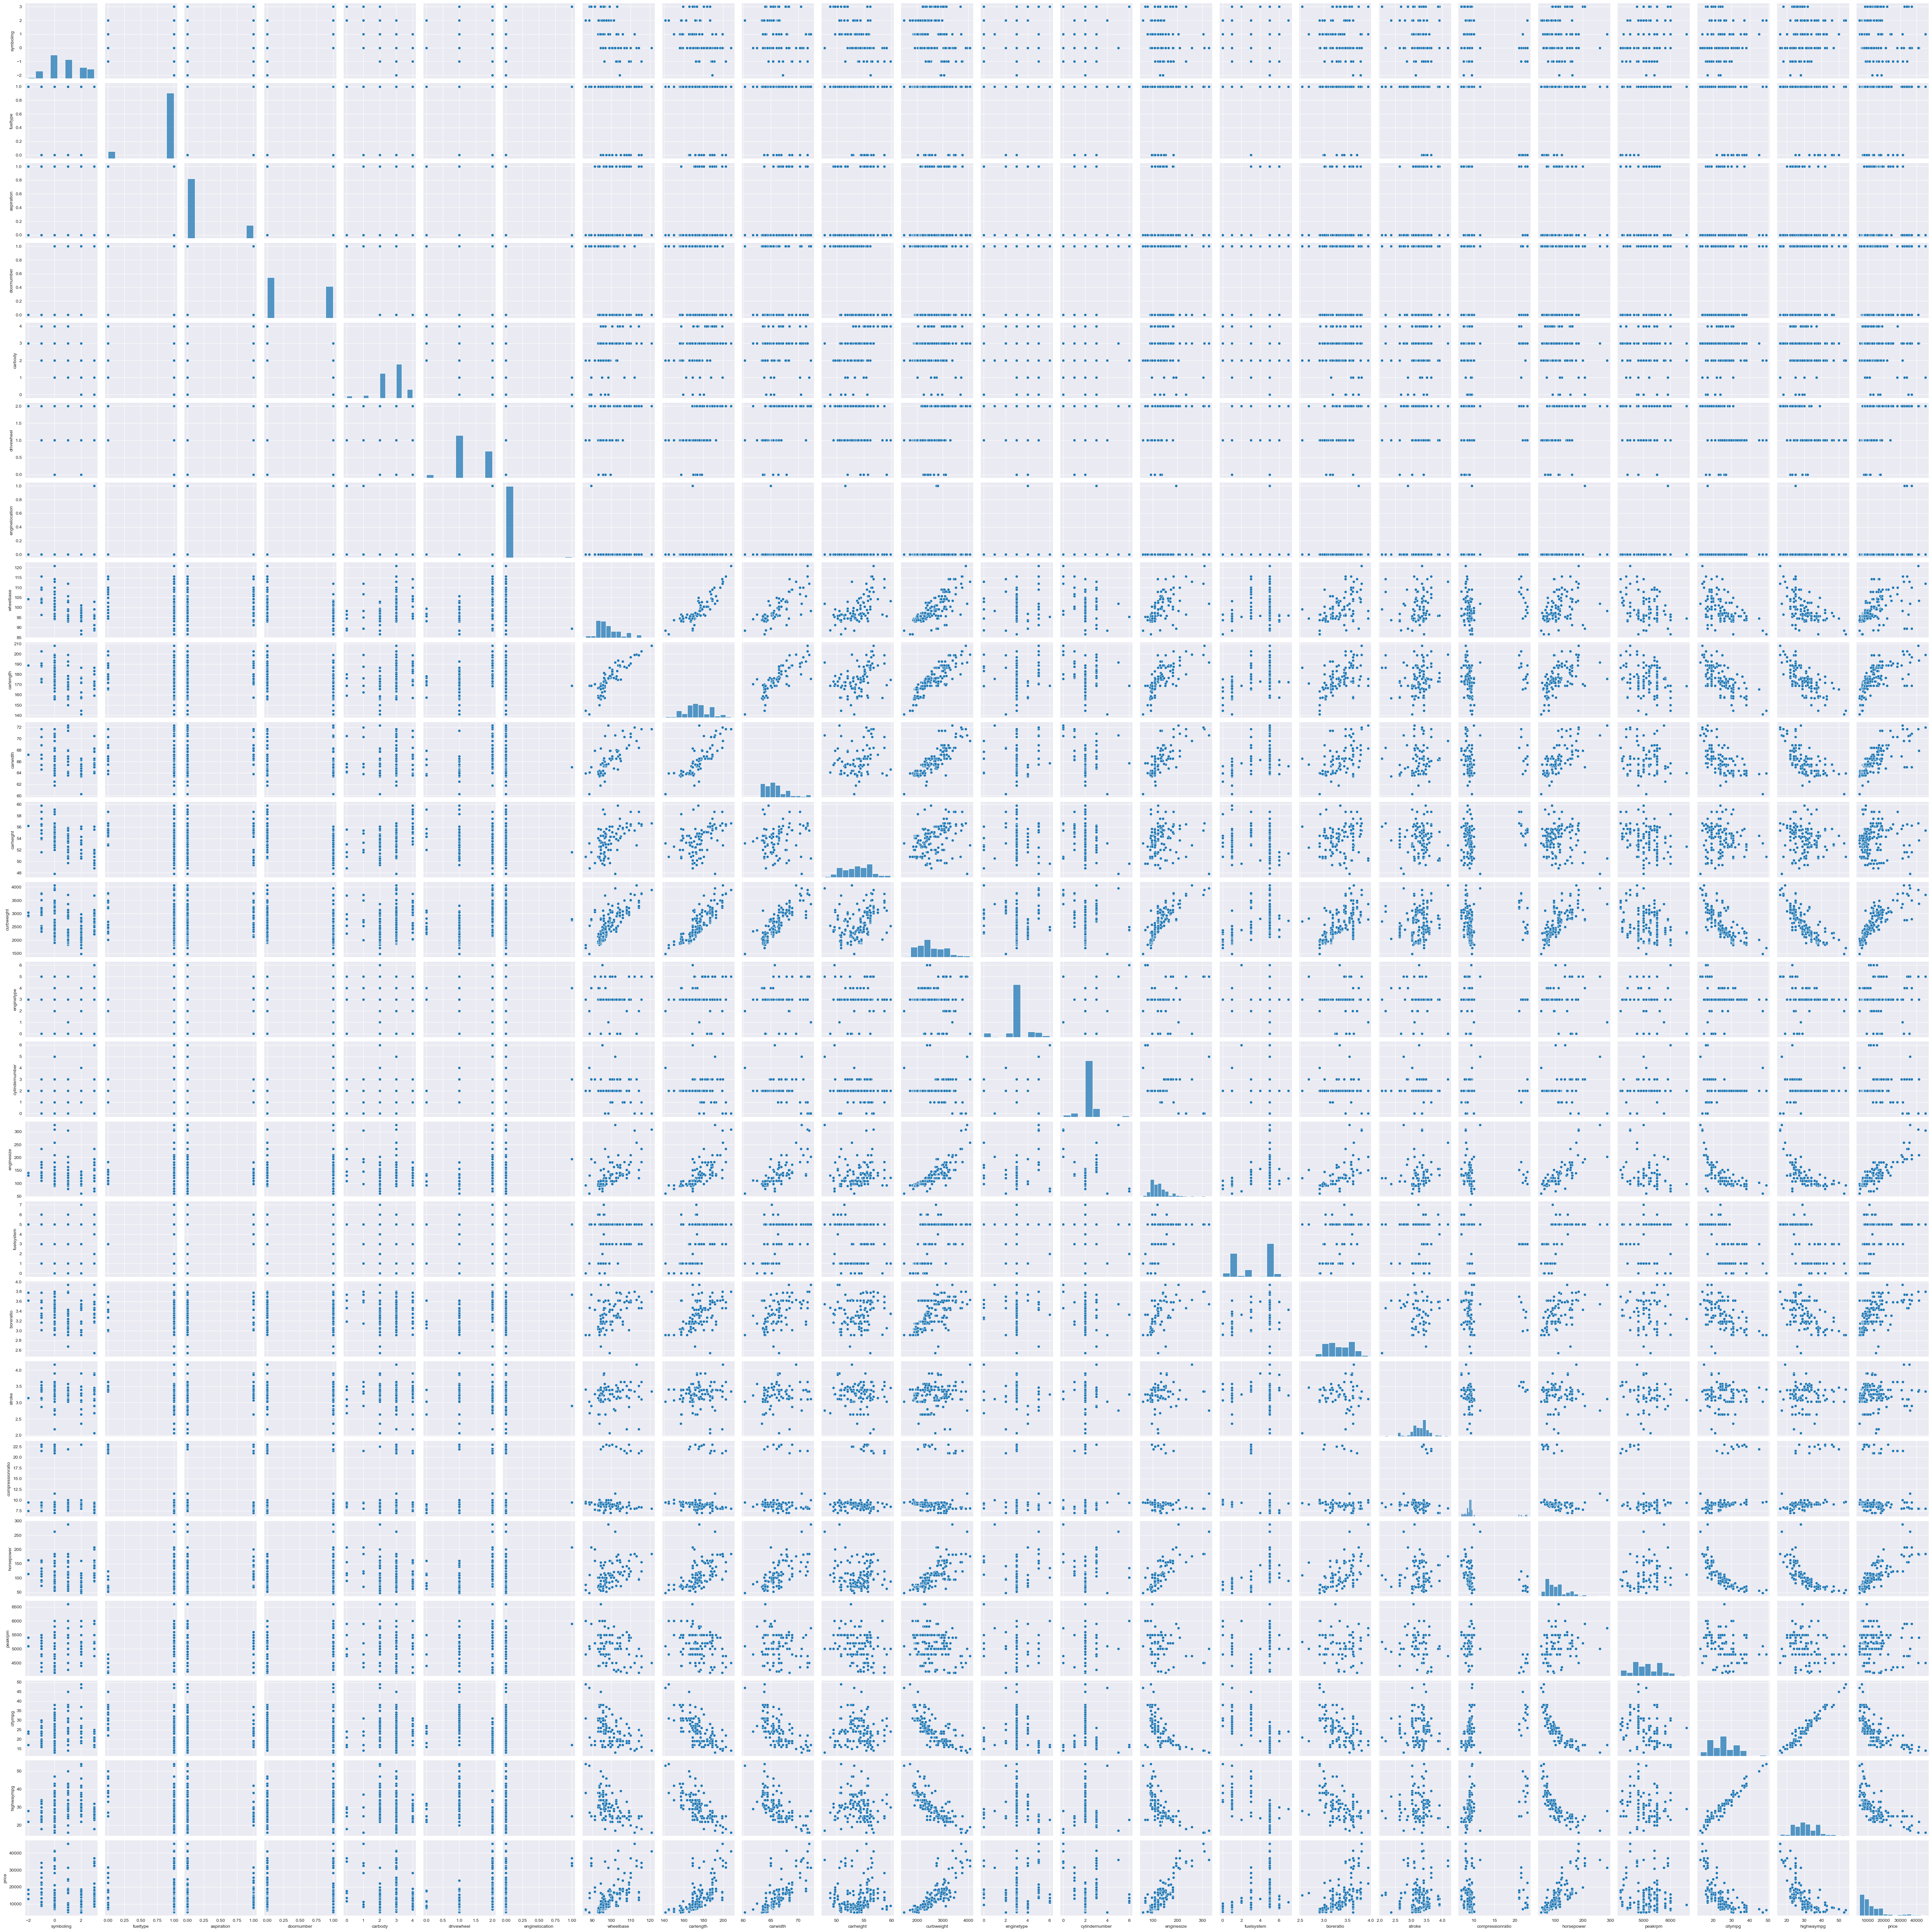

In [115]:
sns.pairplot(data)

C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\changeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

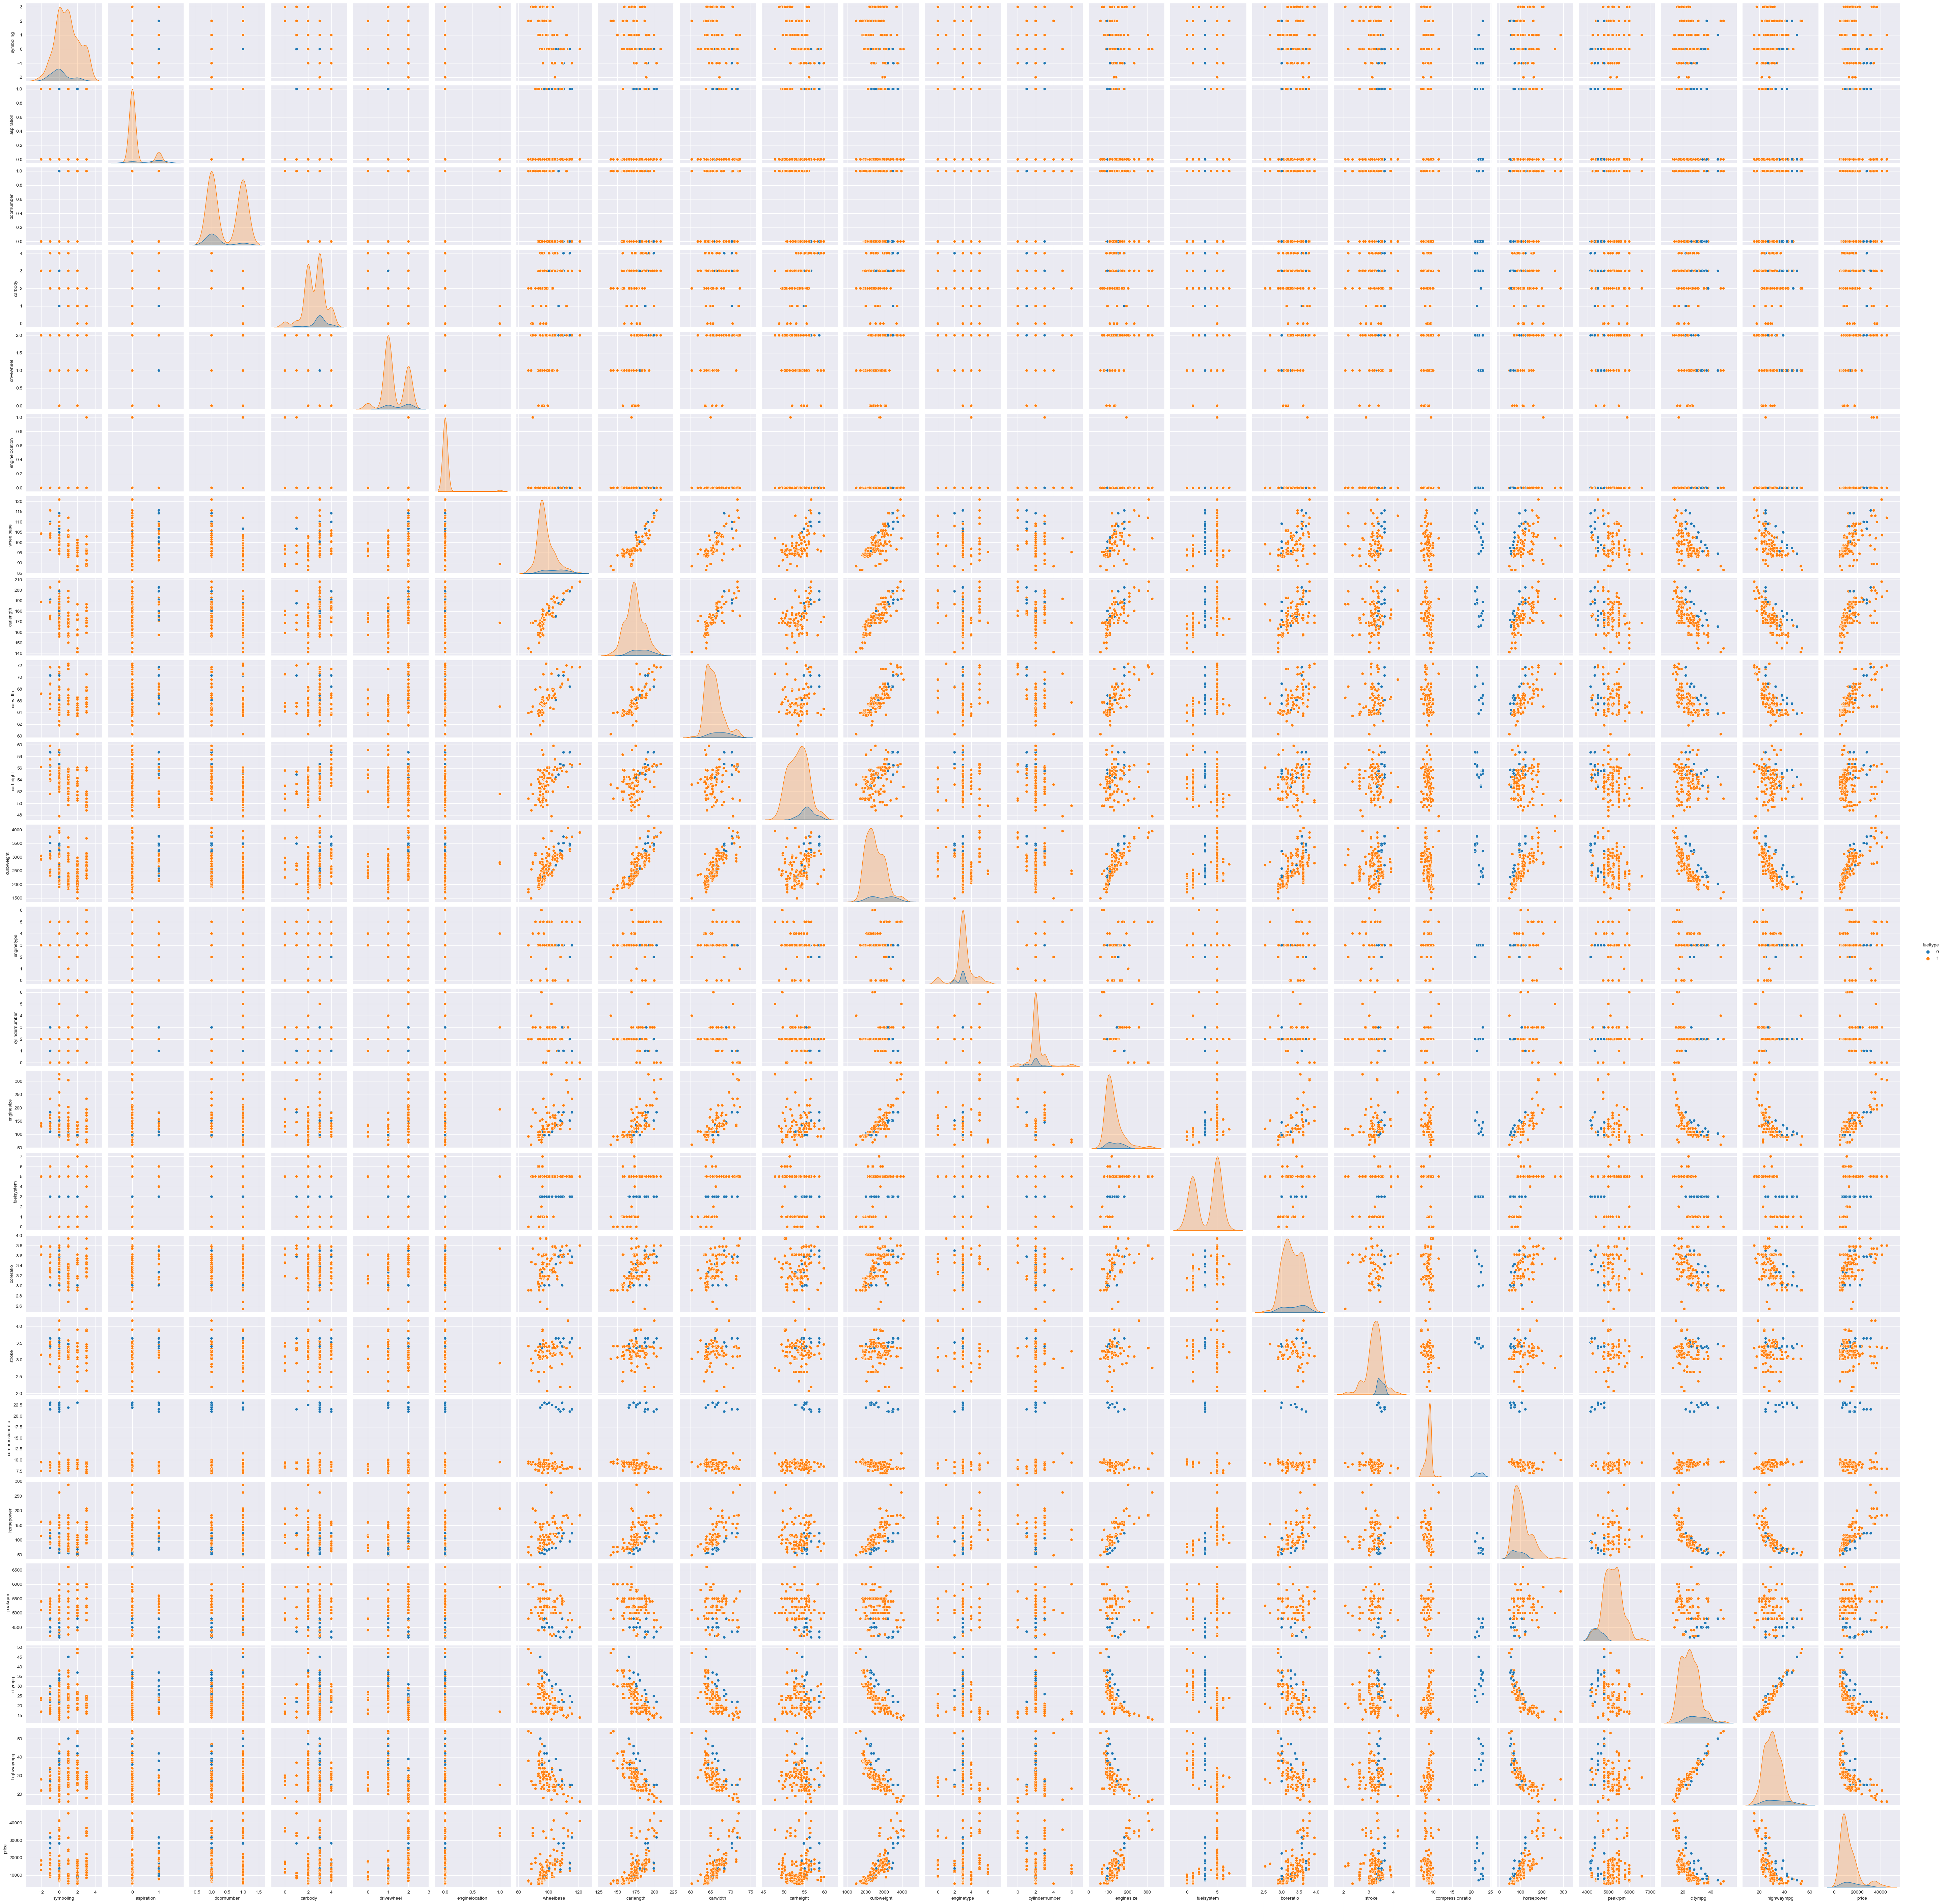

In [116]:
sns.pairplot(data,hue='fueltype')

# Deal with missing values

In [34]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### From the above we can say that data set don't have any Nan or missing values

# Deal with Duplicates

In [38]:
data.duplicated().value_counts()

False    205
Name: count, dtype: int64

In [40]:
data = data.drop_duplicates()

In [42]:
np.shape(data)

(205, 26)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [46]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

# Encoding Categorical Features

# Label Encoder

In [50]:
from sklearn.preprocessing import LabelEncoder

#create a copy 
data_label = data.copy()

# initialize encoder
le = LabelEncoder()

# apply Label Encoding 
data['CarName'] = le.fit_transform(data_label['CarName'])

data.head()


car_ID  symboling  CarName fueltype aspiration doornumber      carbody  \
0       1          3        2      gas        std        two  convertible   
1       2          3        3      gas        std        two  convertible   
2       3          1        1      gas        std        two    hatchback   
3       4          2        4      gas        std       four        sedan   
4       5          2        5      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [52]:
data['fueltype'] = le.fit_transform(data_label['fueltype'])
data.head()

car_ID  symboling  CarName  fueltype aspiration doornumber      carbody  \
0       1          3        2         1        std        two  convertible   
1       2          3        3         1        std        two  convertible   
2       3          1        1         1        std        two    hatchback   
3       4          2        4         1        std       four        sedan   
4       5          2        5         1        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [54]:
data['aspiration'] = le.fit_transform(data_label['aspiration'])
data.head()

car_ID  symboling  CarName  fueltype  aspiration doornumber      carbody  \
0       1          3        2         1           0        two  convertible   
1       2          3        3         1           0        two  convertible   
2       3          1        1         1           0        two    hatchback   
3       4          2        4         1           0       four        sedan   
4       5          2        5         1           0       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [56]:
data['doornumber'] = le.fit_transform(data_label['doornumber'])
data.head()

car_ID  symboling  CarName  fueltype  aspiration  doornumber      carbody  \
0       1          3        2         1           0           1  convertible   
1       2          3        3         1           0           1  convertible   
2       3          1        1         1           0           1    hatchback   
3       4          2        4         1           0           0        sedan   
4       5          2        5         1           0           0        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [58]:
data['carbody'] = le.fit_transform(data_label['carbody'])
data.head()

car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3        2         1           0           1        0   
1       2          3        3         1           0           1        0   
2       3          1        1         1           0           1        2   
3       4          2        4         1           0           0        3   
4       5          2        5         1           0           0        3   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [60]:
data['drivewheel'] = le.fit_transform(data_label['drivewheel'])
data.head()

car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3        2         1           0           1        0   
1       2          3        3         1           0           1        0   
2       3          1        1         1           0           1        2   
3       4          2        4         1           0           0        3   
4       5          2        5         1           0           0        3   

   drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           2          front       88.6  ...         130        mpfi   
1           2          front       88.6  ...         130        mpfi   
2           2          front       94.5  ...         152        mpfi   
3           1          front       99.8  ...         109        mpfi   
4           0          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [62]:
data['enginelocation'] = le.fit_transform(data_label['enginelocation'])
data.head()

car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3        2         1           0           1        0   
1       2          3        3         1           0           1        0   
2       3          1        1         1           0           1        2   
3       4          2        4         1           0           0        3   
4       5          2        5         1           0           0        3   

   drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           2               0       88.6  ...         130        mpfi   
1           2               0       88.6  ...         130        mpfi   
2           2               0       94.5  ...         152        mpfi   
3           1               0       99.8  ...         109        mpfi   
4           0               0       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [64]:
data['fuelsystem'] = le.fit_transform(data_label['fuelsystem'])
data.head()

car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3        2         1           0           1        0   
1       2          3        3         1           0           1        0   
2       3          1        1         1           0           1        2   
3       4          2        4         1           0           0        3   
4       5          2        5         1           0           0        3   

   drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           2               0       88.6  ...         130           5   
1           2               0       88.6  ...         130           5   
2           2               0       94.5  ...         152           5   
3           1               0       99.8  ...         109           5   
4           0               0       99.4  ...         136           5   

   boreratio  stroke compressionratio horsepower  peakrpm  citympg  \
0       3.47    2.68              9.0        111     5000       21   
1       3.47    2.68              9.0        111     5000       21   
2       2.68    3.47              9.0        154     5000       19   
3       3.19    3.40             10.0        102     5500       24   
4       3.19    3.40              8.0        115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [66]:
data['enginetype'] = le.fit_transform(data_label['enginetype'])
data.head()

car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3        2         1           0           1        0   
1       2          3        3         1           0           1        0   
2       3          1        1         1           0           1        2   
3       4          2        4         1           0           0        3   
4       5          2        5         1           0           0        3   

   drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           2               0       88.6  ...         130           5   
1           2               0       88.6  ...         130           5   
2           2               0       94.5  ...         152           5   
3           1               0       99.8  ...         109           5   
4           0               0       99.4  ...         136           5   

   boreratio  stroke  compressionratio horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0        111     5000       21   
1       3.47    2.68               9.0        111     5000       21   
2       2.68    3.47               9.0        154     5000       19   
3       3.19    3.40              10.0        102     5500       24   
4       3.19    3.40               8.0        115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [68]:
data['cylindernumber'] = le.fit_transform(data_label['cylindernumber'])
data.head()

car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3        2         1           0           1        0   
1       2          3        3         1           0           1        0   
2       3          1        1         1           0           1        2   
3       4          2        4         1           0           0        3   
4       5          2        5         1           0           0        3   

   drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           2               0       88.6  ...         130           5   
1           2               0       88.6  ...         130           5   
2           2               0       94.5  ...         152           5   
3           1               0       99.8  ...         109           5   
4           0               0       99.4  ...         136           5   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

# Drop unwanted columns

In [71]:
data = data.drop("car_ID",axis=1)
data = data.drop("CarName",axis=1)
data.head()

symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3         1           0           1        0           2   
1          3         1           0           1        0           2   
2          1         1           0           1        2           2   
3          2         1           0           0        3           1   
4          2         1           0           0        3           0   

   enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0               0       88.6      168.8      64.1  ...         130   
1               0       88.6      168.8      64.1  ...         130   
2               0       94.5      171.2      65.5  ...         152   
3               0       99.8      176.6      66.2  ...         109   
4               0       99.4      176.6      66.4  ...         136   

   fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           5       3.47    2.68               9.0         111     5000   
1           5       3.47    2.68               9.0         111     5000   
2           5       2.68    3.47               9.0         154     5000   
3           5       3.19    3.40              10.0         102     5500   
4           5       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0  

[5 rows x 24 columns]

# spliting data into Independent and Dependent Variable in terms of X and Y

In [74]:
x = data.iloc[:,0:-1]
y = data.iloc[:,[-1]]

In [76]:
x

symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         1           0           1        0           2   
1            3         1           0           1        0           2   
2            1         1           0           1        2           2   
3            2         1           0           0        3           1   
4            2         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200         -1         1           0           0        3           2   
201         -1         1           1           0        3           2   
202         -1         1           0           0        3           2   
203         -1         0           1           0        3           2   
204         -1         1           1           0        3           2   

     enginelocation  wheelbase  carlength  carwidth  ...  cylindernumber  \
0                 0       88.6      168.8      64.1  ...               2   
1                 0       88.6      168.8      64.1  ...               2   
2                 0       94.5      171.2      65.5  ...               3   
3                 0       99.8      176.6      66.2  ...               2   
4                 0       99.4      176.6      66.4  ...               1   
..              ...        ...        ...       ...  ...             ...   
200               0      109.1      188.8      68.9  ...               2   
201               0      109.1      188.8      68.8  ...               2   
202               0      109.1      188.8      68.9  ...               3   
203               0      109.1      188.8      68.9  ...               3   
204               0      109.1      188.8      68.9  ...               2   

     enginesize  fuelsystem  boreratio  stroke  compressionratio  horsepower  \
0           130           5       3.47    2.68               9.0         111   
1           130           5       3.47    2.68               9.0         111   
2           152           5       2.68    3.47               9.0         154   
3           109           5       3.19    3.40              10.0         102   
4           136           5       3.19    3.40               8.0         115   
..          ...         ...        ...     ...               ...         ...   
200         141           5       3.78    3.15               9.5         114   
201         141           5       3.78    3.15               8.7         160   
202         173           5       3.58    2.87               8.8         134   
203         145           3       3.01    3.40              23.0         106   
204         141           5       3.78    3.15               9.5         114   

     peakrpm  citympg  highwaympg  
0       5000       21          27  
1       5000       21          27  
2       5000       19          26  
3       5500       24          30  
4       5500       18          22  
..       ...      ...         ...  
200     5400       23          28  
201     5300       19          25  
202     5500       18          23  
203     4800       26          27  
204     5400       19          25  

[205 rows x 23 columns]

In [78]:
y

price
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
..       ...
200  16845.0
201  19045.0
202  21485.0
203  22470.0
204  22625.0

[205 rows x 1 columns]

# feature scaling using MinMaxScaler

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [83]:
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)
print("MinMax Scaled:\n", x)
print("MinMax Scaled:\n", y)

MinMax Scaled:
 [[1.         1.         0.         ... 0.34693878 0.22222222 0.28947368]
 [1.         1.         0.         ... 0.34693878 0.22222222 0.28947368]
 [0.6        1.         0.         ... 0.34693878 0.16666667 0.26315789]
 ...
 [0.2        1.         0.         ... 0.55102041 0.13888889 0.18421053]
 [0.2        0.         1.         ... 0.26530612 0.36111111 0.28947368]
 [0.2        1.         1.         ... 0.51020408 0.16666667 0.23684211]]
MinMax Scaled:
 [[2.07958890e-01]
 [2.82557966e-01]
 [2.82557966e-01]
 [2.19254257e-01]
 [3.06141701e-01]
 [2.51526737e-01]
 [3.12596197e-01]
 [3.42634427e-01]
 [4.65642222e-01]
 [3.16299265e-01]
 [2.80820217e-01]
 [2.93108584e-01]
 [3.93525644e-01]
 [3.96877017e-01]
 [4.82771461e-01]
 [6.36562236e-01]
 [8.98589941e-01]
 [7.88491137e-01]
 [8.19224468e-04]
 [2.92190060e-02]
 [3.61700015e-02]
 [1.12705427e-02]
 [3.12546547e-02]
 [7.04781292e-02]
 [2.75805571e-02]
 [3.90745246e-02]
 [6.18390348e-02]
 [8.53979445e-02]
 [9.44094136e-02]
 [

# Importing Multilinear Regression 

In [87]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [88]:
reg.fit(x,y)

LinearRegression()

In [92]:
reg.score(x,y)

0.8802434927425343

In [94]:
reg.coef_

array([[ 0.0192056 , -0.22762983,  0.00524591, -0.01678523, -0.07768995,
         0.05938149,  0.25567816,  0.11220452, -0.05371972,  0.20398377,
         0.05550741,  0.15149056,  0.03148157,  0.01391247,  0.66212416,
        -0.02844473, -0.09511484, -0.14642688, -0.21697208,  0.13828498,
         0.12622945, -0.11326764,  0.11639954]])

In [96]:
reg.intercept_

array([0.1297638])

In [98]:
y_predict = reg.predict(x)

In [100]:
y_predict

array([[ 0.19227917],
       [ 0.19227917],
       [ 0.32985355],
       [ 0.13524362],
       [ 0.23038927],
       [ 0.21454542],
       [ 0.35329241],
       [ 0.34033383],
       [ 0.37624217],
       [ 0.29531548],
       [ 0.18169178],
       [ 0.19079478],
       [ 0.25265568],
       [ 0.27267287],
       [ 0.32742724],
       [ 0.52265383],
       [ 0.51858186],
       [ 0.62145255],
       [-0.13253895],
       [ 0.02873508],
       [ 0.02198822],
       [ 0.0222676 ],
       [ 0.03209171],
       [ 0.08216651],
       [ 0.05329924],
       [ 0.03516953],
       [ 0.03516953],
       [ 0.06552096],
       [ 0.14810348],
       [ 0.24335266],
       [-0.03656586],
       [ 0.05490883],
       [ 0.01531696],
       [ 0.07799409],
       [ 0.0789343 ],
       [ 0.0828334 ],
       [ 0.08448294],
       [ 0.13167223],
       [ 0.13478666],
       [ 0.13039723],
       [ 0.08849675],
       [ 0.12230643],
       [ 0.10847418],
       [ 0.05783228],
       [ 0.00931259],
       [ 0

In [102]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
MAE = mean_absolute_error(y_true=y,y_pred=y_predict)
MSE = mean_squared_error(y_true=y,y_pred=y_predict)
RMSE = root_mean_squared_error(y_true=y,y_pred=y_predict)

print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)

MAE =  0.04983384922989906
MSE =  0.0046872936759795245
RMSE =  0.06846381289396264


# Same thing with Polynomial Regression

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#converting X into Poly features
poly=PolynomialFeatures(degree=2)
x = poly.fit_transform(x)

polyreg = LinearRegression()
polyreg.fit(x,y)


LinearRegression()

In [107]:
polyreg.score(x,y)

0.9987451406622704

### Making predictions

In [110]:
y_predict = polyreg.predict(x)

In [112]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
MAE = mean_absolute_error(y_true=y,y_pred=y_predict)
MSE = mean_squared_error(y_true=y,y_pred=y_predict)
RMSE = root_mean_squared_error(y_true=y,y_pred=y_predict)

print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)

MAE =  0.0019367316153263688
MSE =  4.911544577146281e-05
RMSE =  0.007008241275203274


#### By using polynomial Regression acuuracy has increased from 88.08 % to 99.87 %

# Conclusion:

### By applying Polynomial Regression, the model's accuracy improved significantly from 88.08% to 99.87%.
### For the given dataset, Polynomial Regression proves to be the most suitable regression technique.
### Our car price prediction model can now predict values with an impressive 99.87% accuracy, making it highly reliable for practical use.